In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission_sample = pd.read_csv('gender_submission.csv')


In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
submission_sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
print("\nTrain Dataset Overview:\n", train.info())
print("\nTest Dataset Overview:\n", test.info())

print("\nTrain Dataset Statistics:\n", train.describe())
print("\nTest Dataset Statistics:\n", test.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Train Dataset Overview:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [8]:
print("\nMissing Values in Train Dataset:\n", train.isnull().sum())
print("\nMissing Values in Test Dataset:\n", test.isnull().sum())



Missing Values in Train Dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


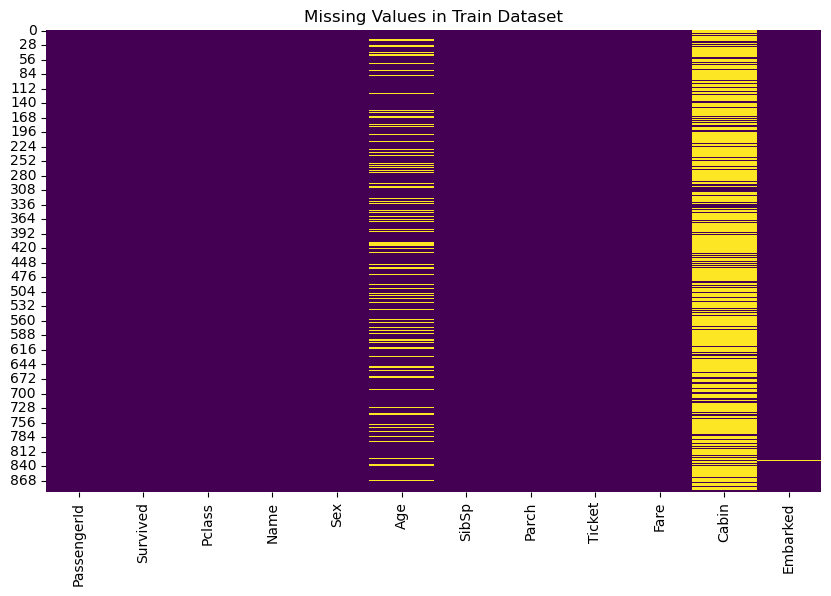

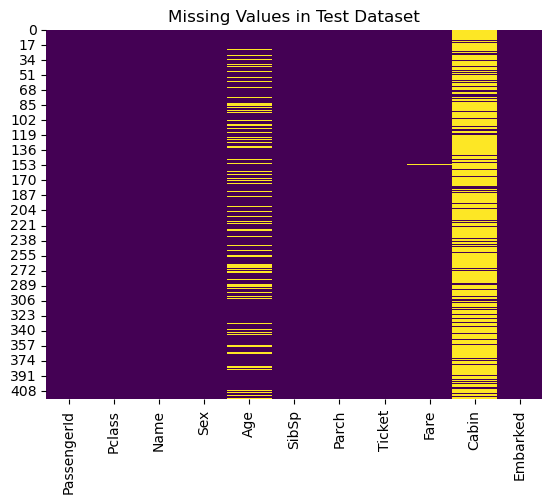

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Train Dataset")
plt.show()

sns.heatmap(test.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Test Dataset")
plt.show()


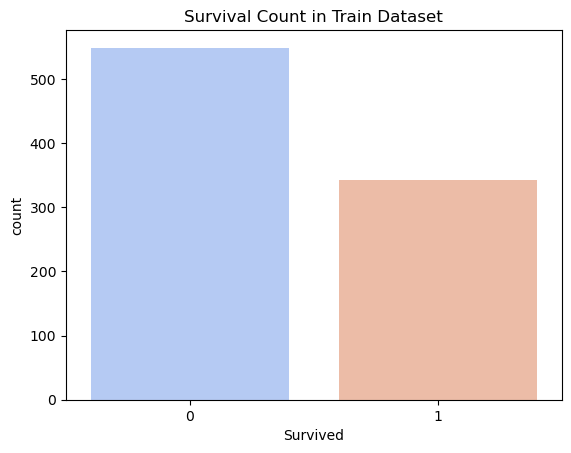

In [16]:
sns.countplot(x='Survived', data=train, palette='coolwarm')
plt.title("Survival Count in Train Dataset")
plt.show()


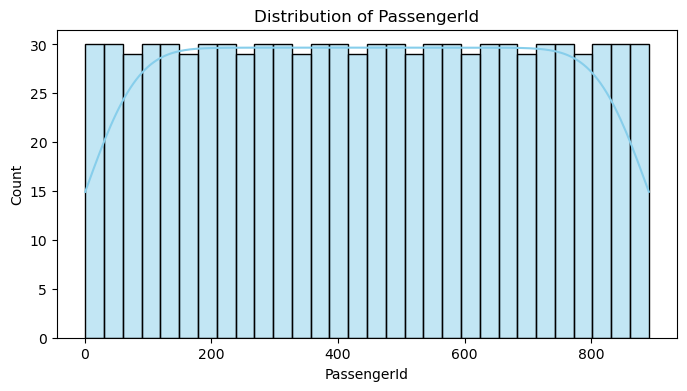

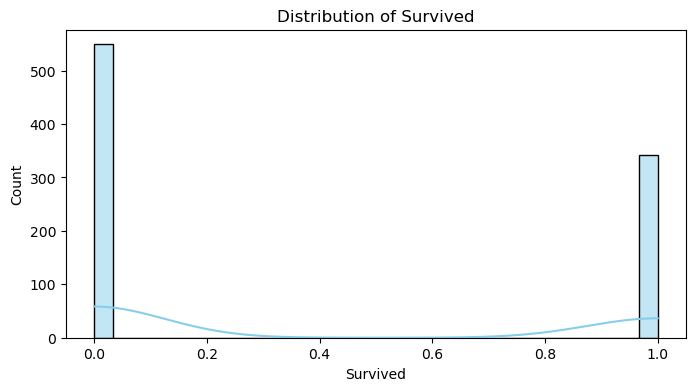

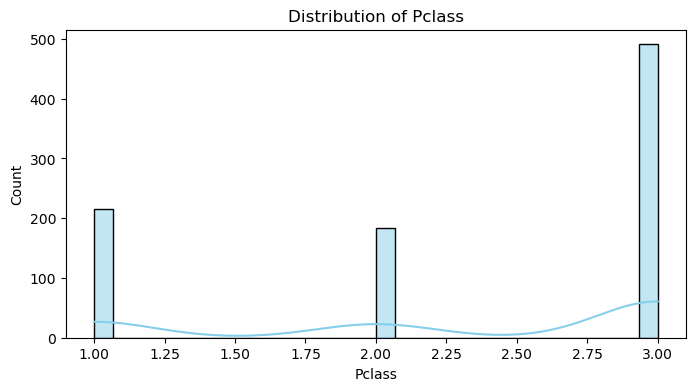

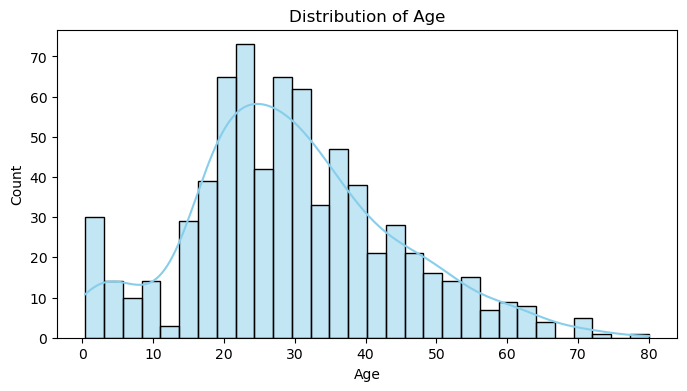

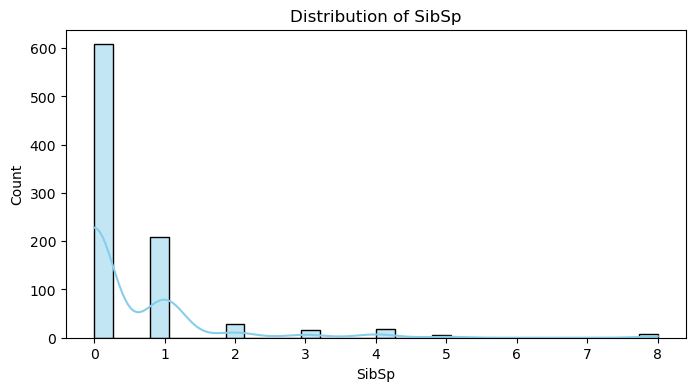

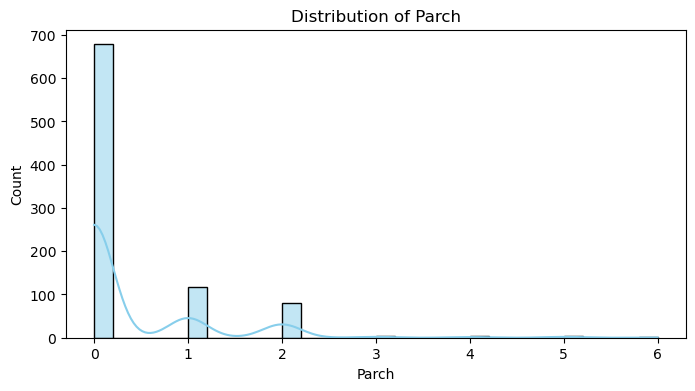

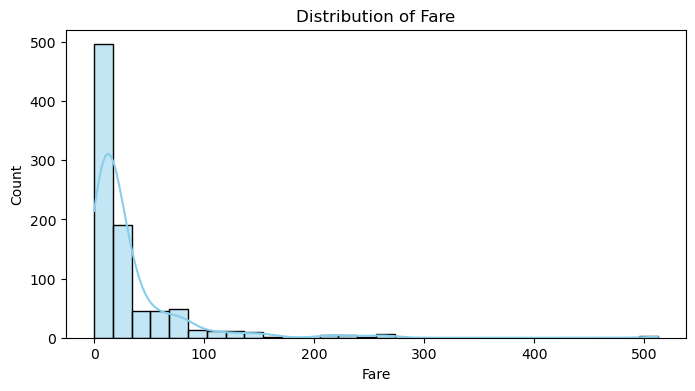

In [25]:
numeric_columns = train.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[col], kde=True, color="skyblue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


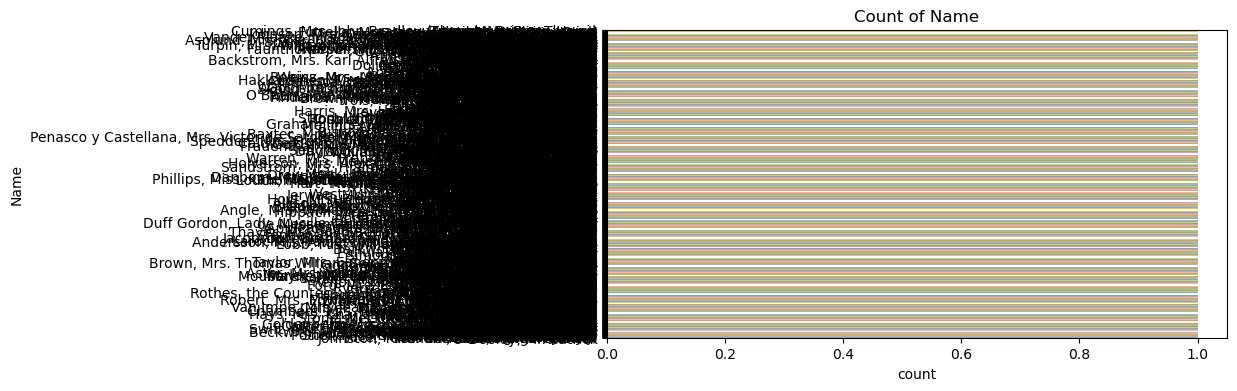

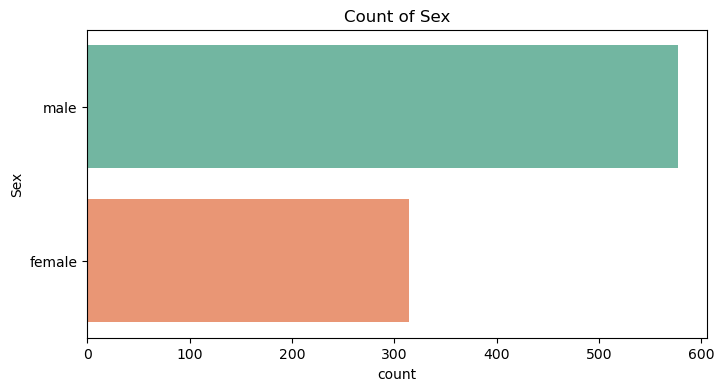

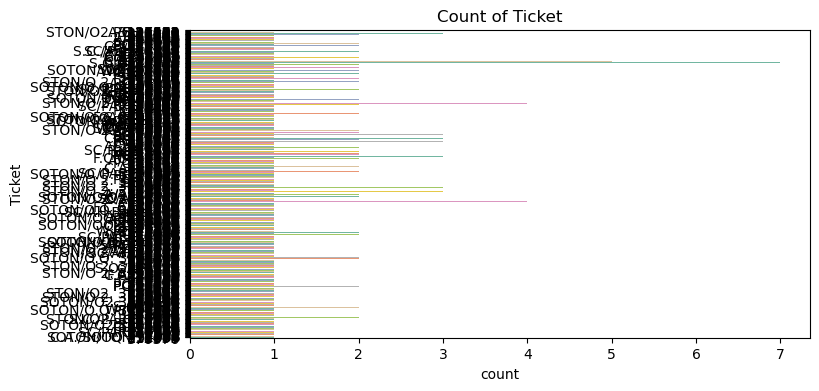

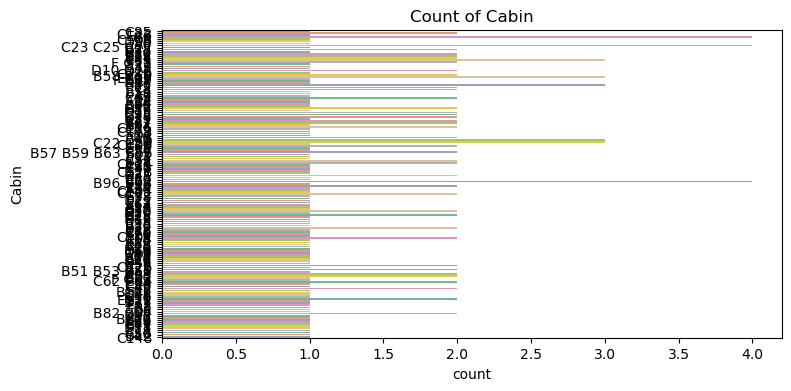

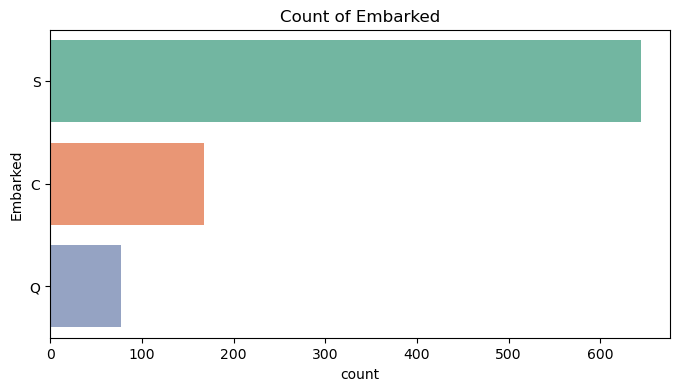

In [30]:
categorical_columns = train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=train, palette="Set2")
    plt.title(f"Count of {col}")
    plt.show()


Bivariate Analysis with the Target Variable

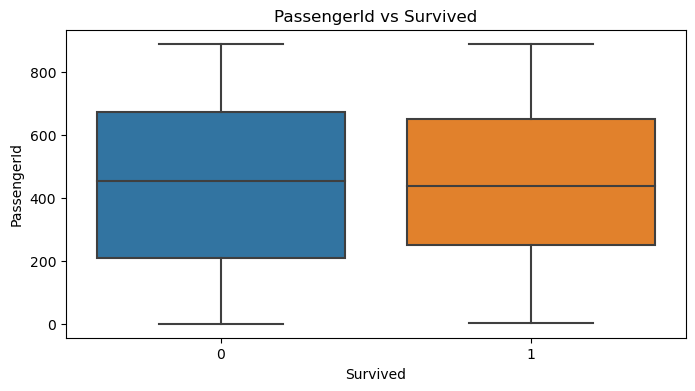

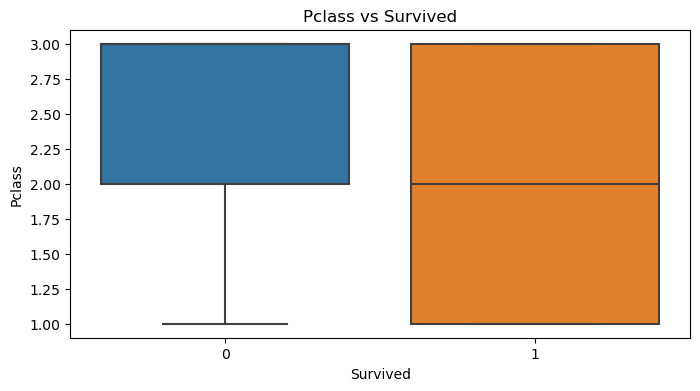

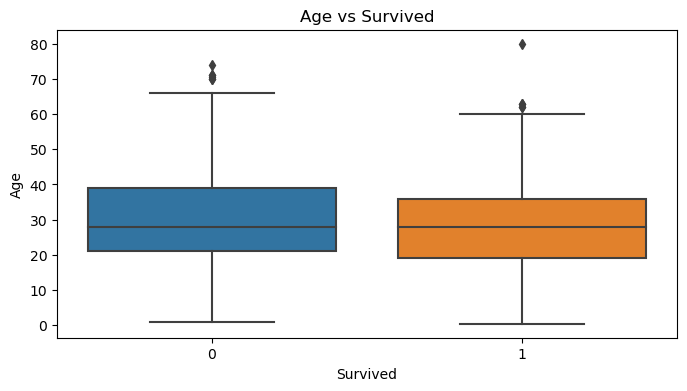

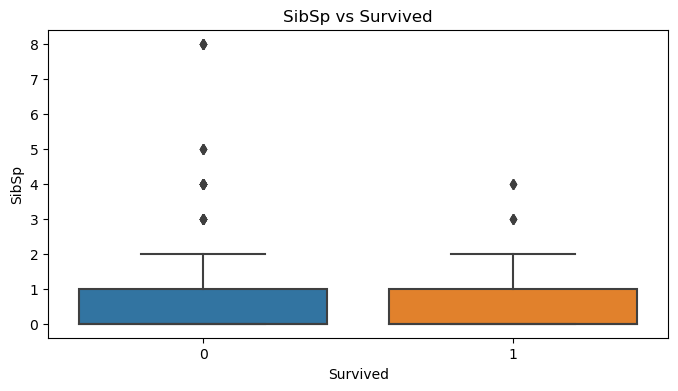

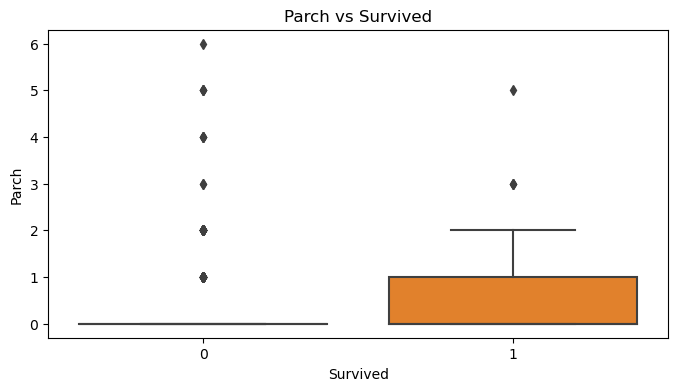

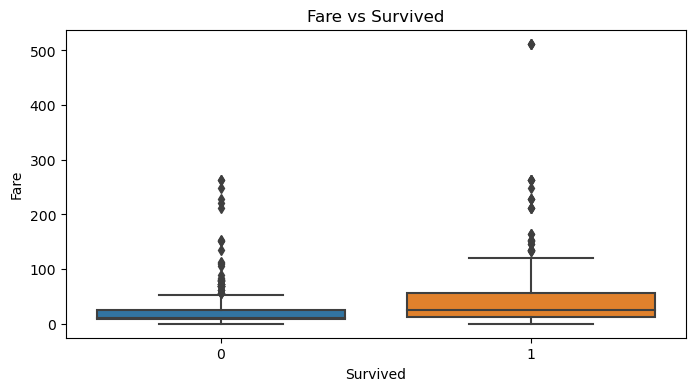

In [31]:
for col in numeric_columns:
    if col != 'Survived':  # Avoiding target variable itself
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Survived', y=col, data=train)
        plt.title(f"{col} vs Survived")
        plt.show()


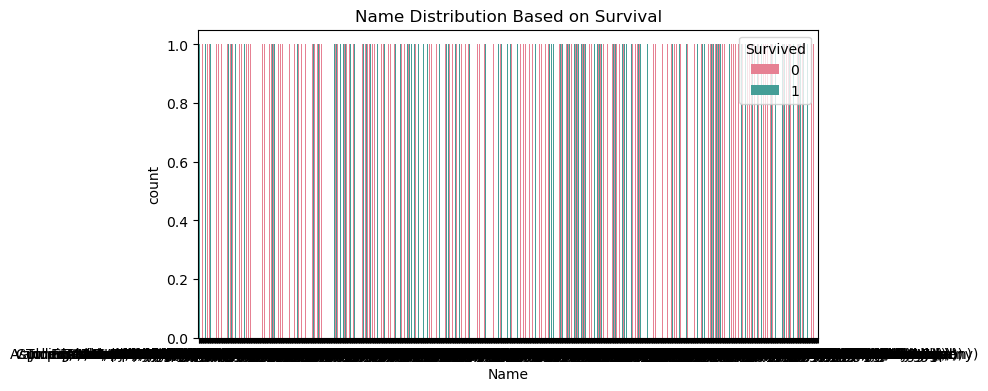

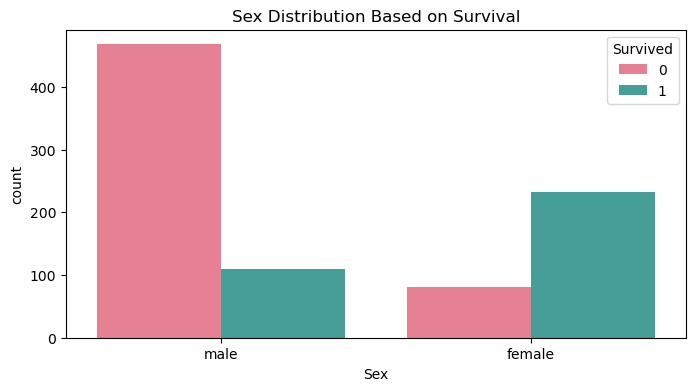

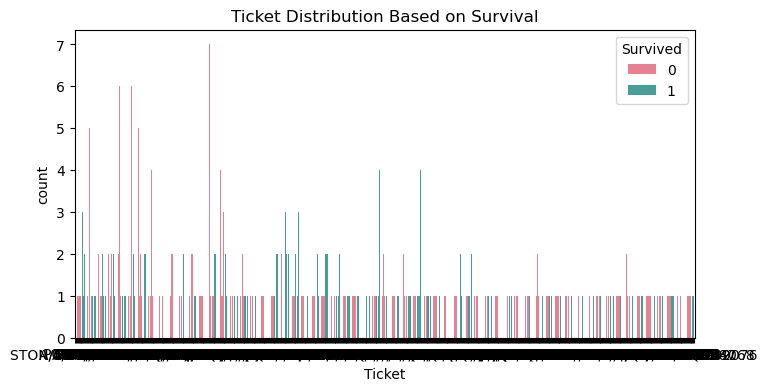

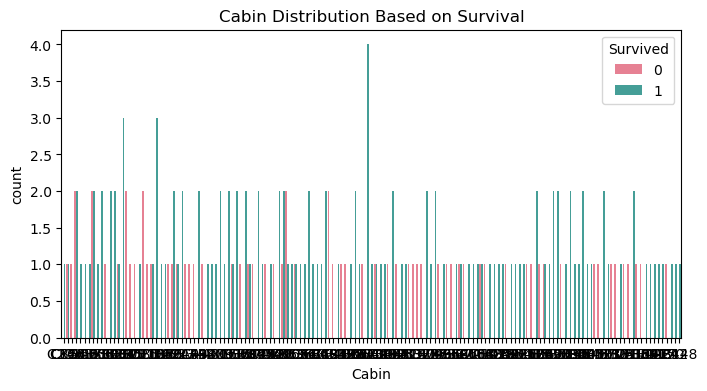

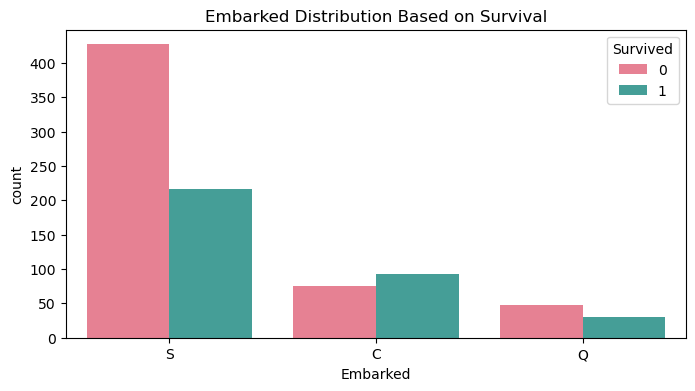

In [32]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Survived', data=train, palette='husl')
    plt.title(f"{col} Distribution Based on Survival")
    plt.show()


Correlation Analysis

C:\Users\apush\AppData\Local\Temp\ipykernel_25088\4025667947.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")


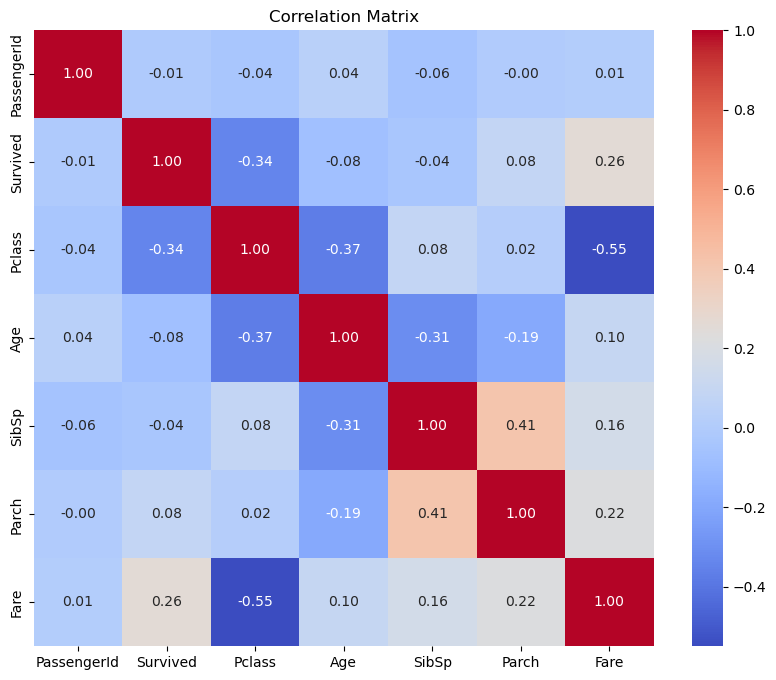

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


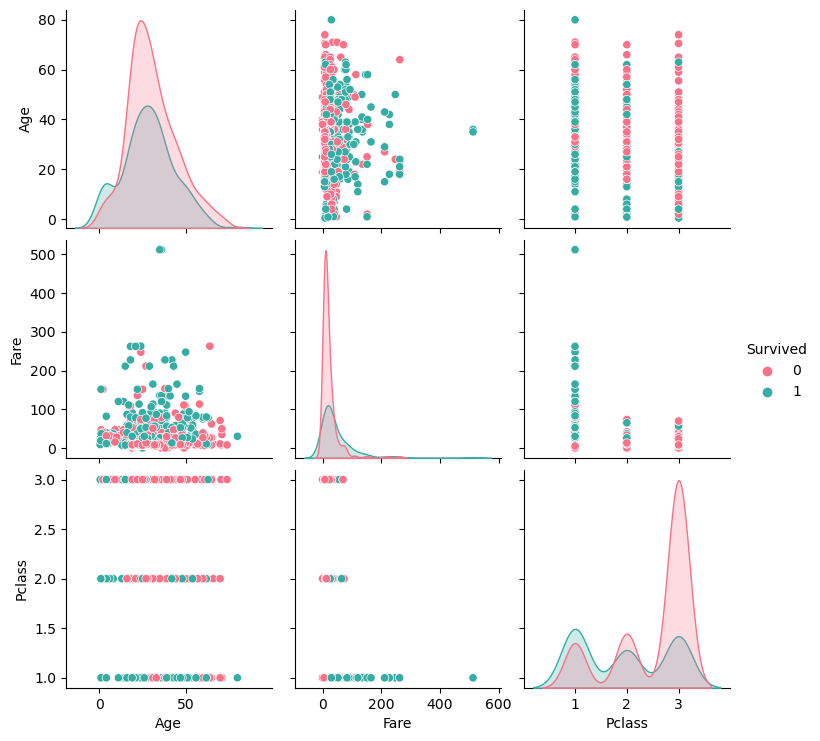

In [34]:
selected_features = ['Age', 'Fare', 'Survived', 'Pclass']  # Add more as relevant
sns.pairplot(train[selected_features], hue='Survived', palette='husl')
plt.show()


In [35]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())


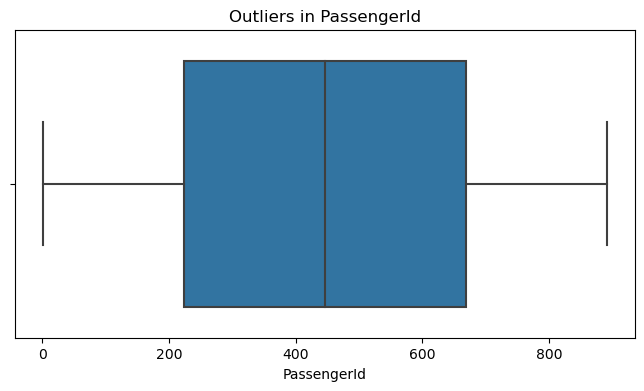

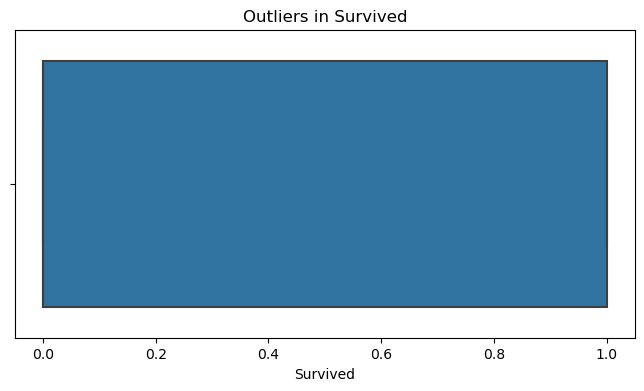

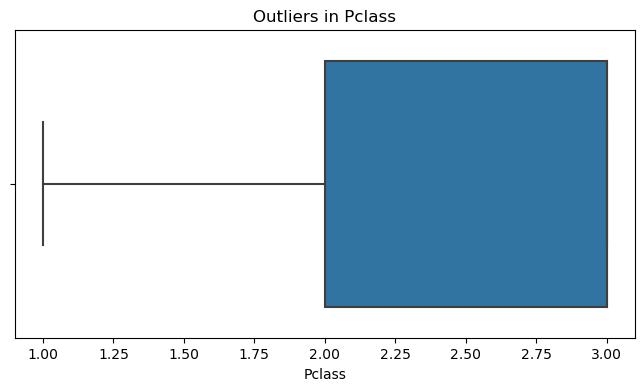

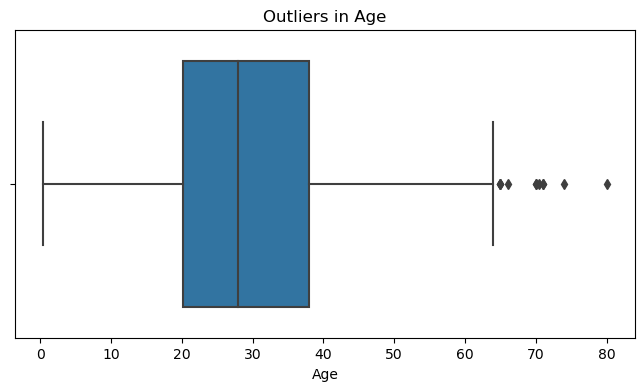

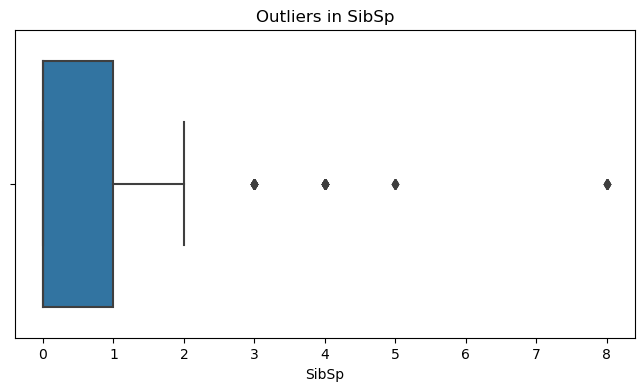

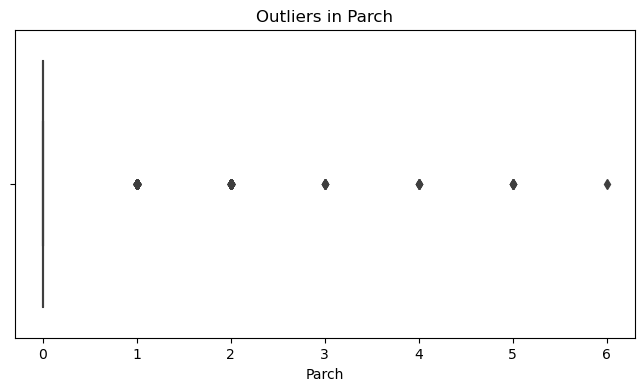

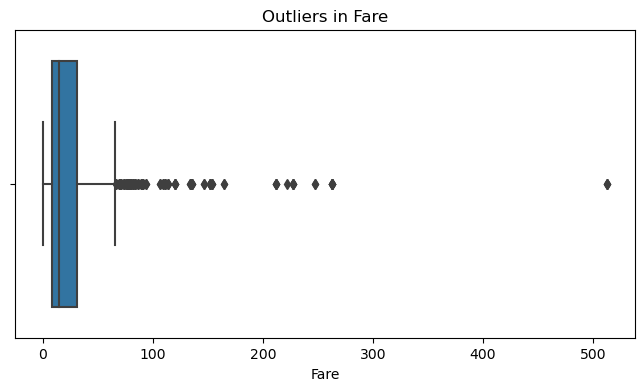

In [39]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [41]:
print("Train Columns:", train.columns)
print("Test Columns:", test.columns)


Train Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title'],
      dtype='object')
Test Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title'],
      dtype='object')


In [42]:
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()

# Exclude 'Survived' if it's not in the test columns
if 'Survived' in numeric_columns and 'Survived' not in test.columns:
    numeric_columns.remove('Survived')


In [43]:
def handle_outliers_iqr(df, col):
    if col in df.columns:  # Check if the column exists in the dataset
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values outside bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply to numeric columns safely
for col in numeric_columns:
    handle_outliers_iqr(train, col)
    handle_outliers_iqr(test, col)


In [44]:
print("Train dataset after handling outliers:")
print(train.describe())

print("Test dataset after handling outliers:")
print(test.describe())


Train dataset after handling outliers:
       PassengerId    Survived      Pclass         Age       SibSp  Parch  \
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.0   
mean    446.000000    0.383838    2.308642   29.622700    0.426487    0.0   
std     257.353842    0.486592    0.836071   14.316665    0.708246    0.0   
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.0   
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.0   
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.0   
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.0   
max     891.000000    1.000000    3.000000   64.812500    2.500000    0.0   

             Fare  FamilySize  
count  891.000000  891.000000  
mean    24.046813    1.664983  
std     20.481625    0.914151  
min      0.000000    1.000000  
25%      7.910400    1.000000  
50%     14.454200    1.000000  
75%     31.000000    2.000000  
max     65.

Log Transformation (Handle Skewed Outliers)

In [48]:
for col in numeric_columns:
    if (train[col] > 0).all():  # Log transform only for positive values
        train[col] = np.log1p(train[col])
        test[col] = np.log1p(test[col])


 Winsorization

In [49]:
from scipy.stats.mstats import winsorize

def winsorize_outliers(df, col, lower_limit=0.01, upper_limit=0.99):
    df[col] = winsorize(df[col], limits=(lower_limit, 1 - upper_limit))

for col in numeric_columns:
    winsorize_outliers(train, col)
    winsorize_outliers(test, col)


Scaling (Normalization or Standardization)

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # or MinMaxScaler()

train[numeric_columns] = scaler.fit_transform(train[numeric_columns])
test[numeric_columns] = scaler.transform(test[numeric_columns])


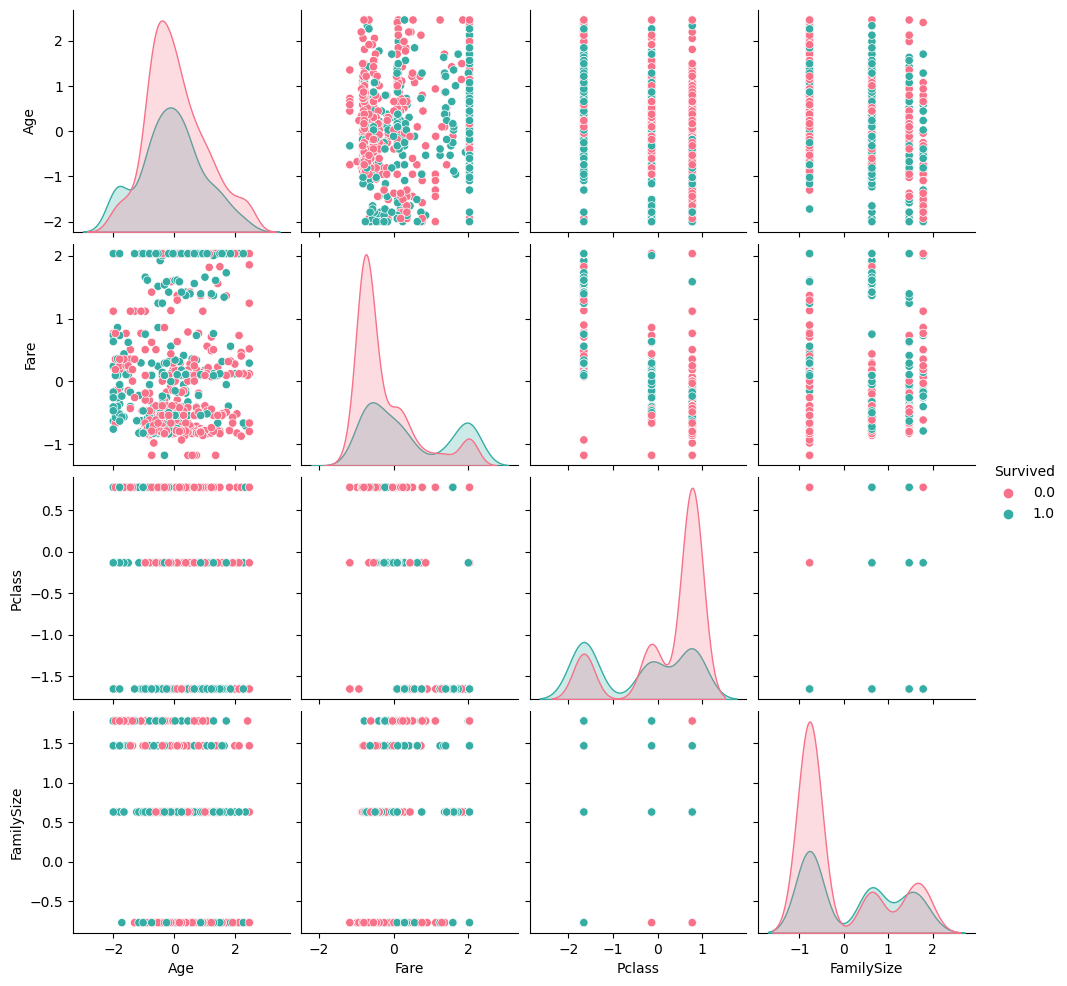

In [52]:
selected_features = ['Age', 'Fare', 'Pclass', 'FamilySize', 'Survived']  # Include relevant columns
sns.pairplot(train[selected_features], hue='Survived', palette='husl')
plt.show()


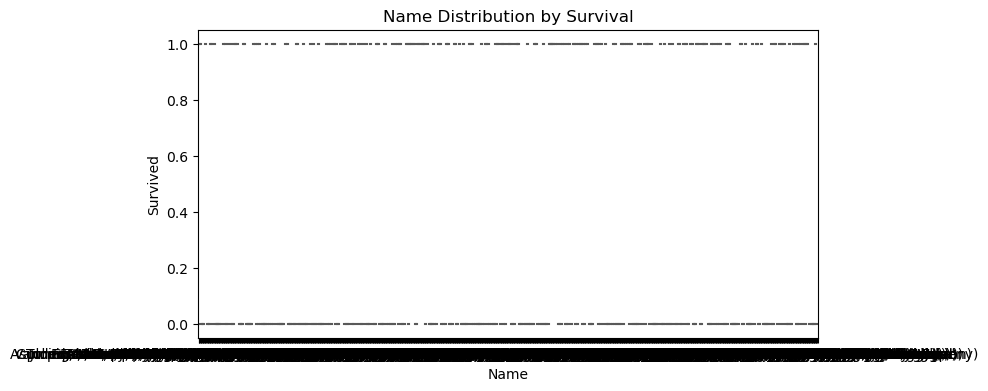

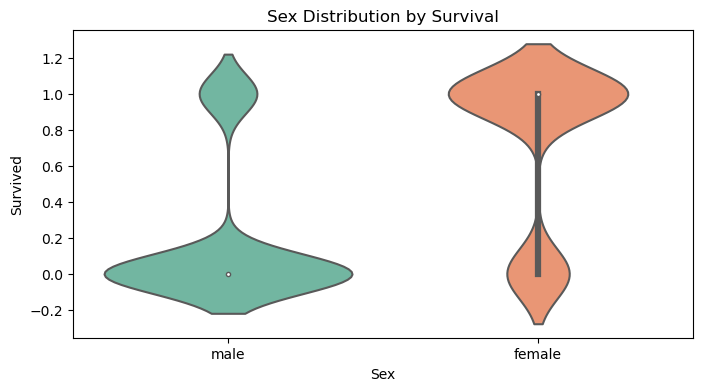

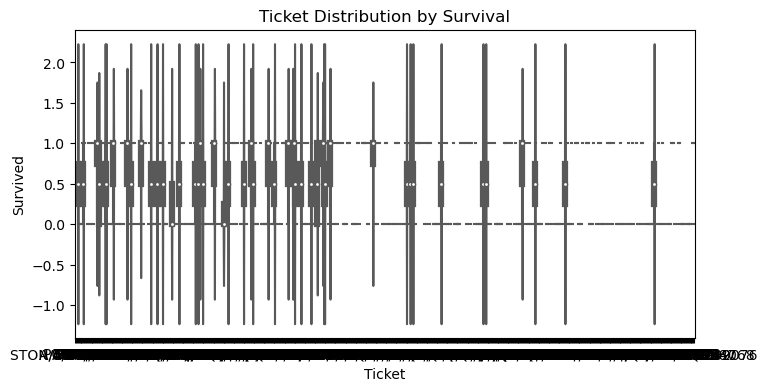

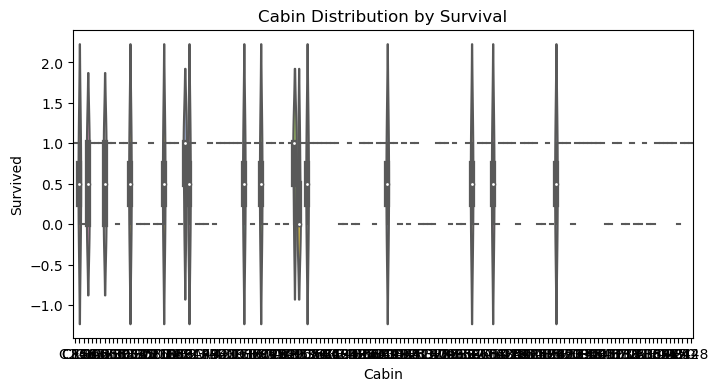

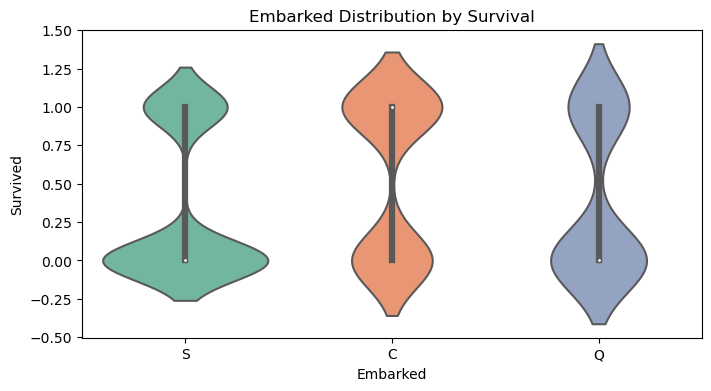

In [53]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=col, y='Survived', data=train, palette="Set2")
    plt.title(f"{col} Distribution by Survival")
    plt.show()


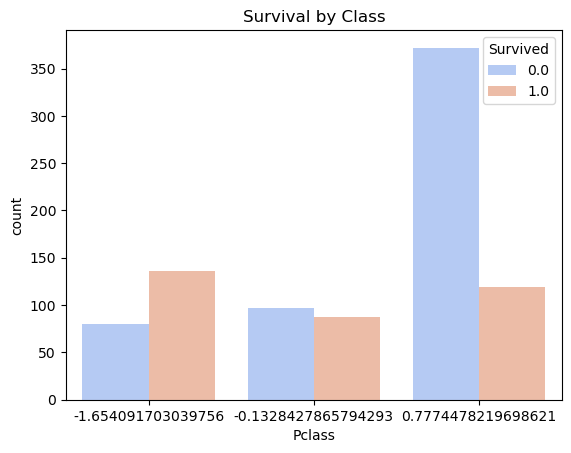

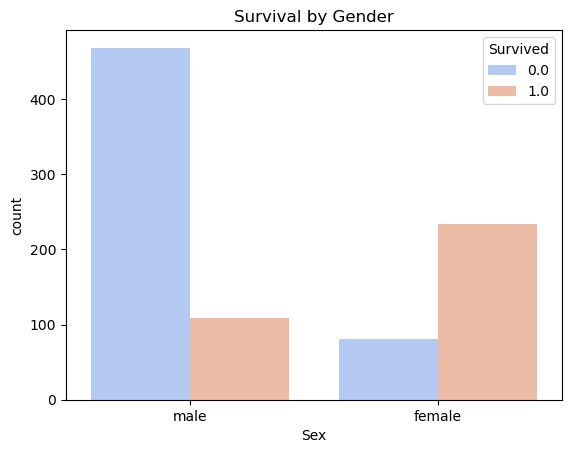

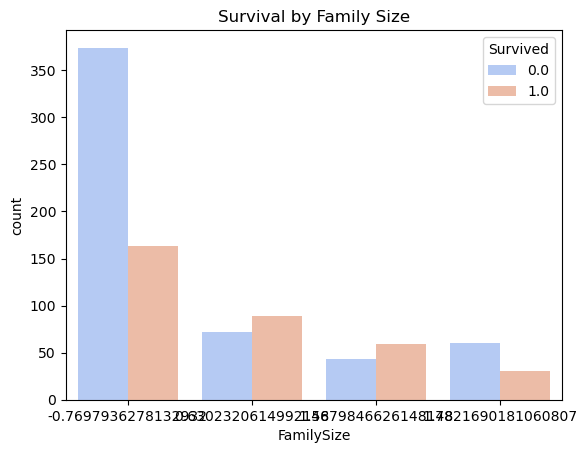

In [54]:
# Survival rate by class (Pclass)
sns.countplot(x='Pclass', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival by Class")
plt.show()

# Survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival by Gender")
plt.show()

# Survival rate by family size
sns.countplot(x='FamilySize', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival by Family Size")
plt.show()


Check Feature Interaction:
Interactions between Features:
Use heatmaps to visualize interactions.
Explore categorical features and their interaction with continuous variables.

C:\Users\apush\AppData\Local\Temp\ipykernel_25088\3725766221.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")


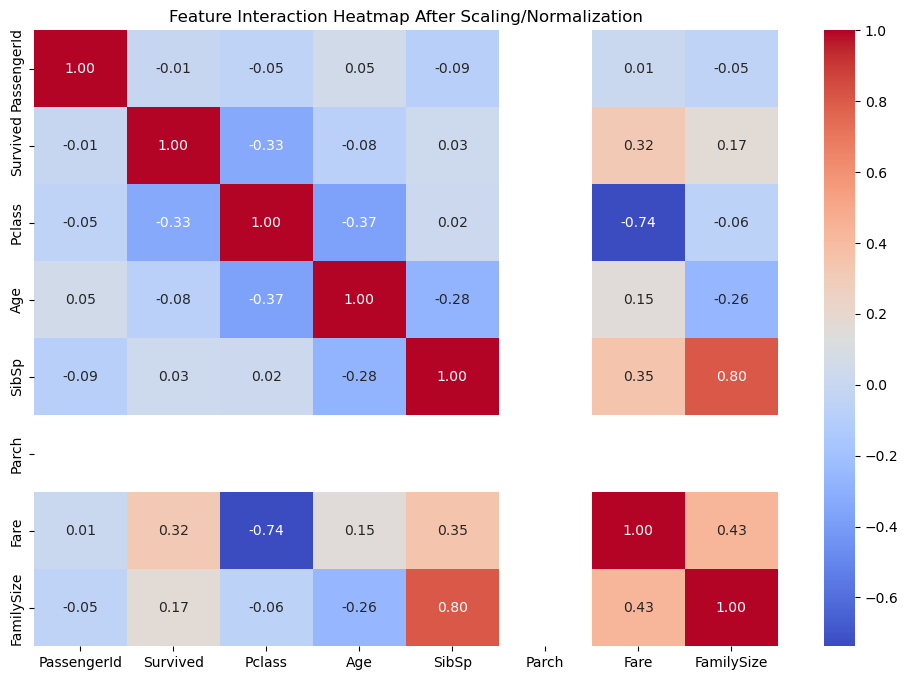

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Interaction Heatmap After Scaling/Normalization")
plt.show()


In [58]:
from sklearn.impute import SimpleImputer

# Define the imputer for numeric features
numeric_imputer = SimpleImputer(strategy='mean')

# Fit and transform train and test data
train[numeric_columns] = numeric_imputer.fit_transform(train[numeric_columns])
test[numeric_columns] = numeric_imputer.transform(test[numeric_columns])


In [59]:
train.dropna(inplace=True)
test.dropna(inplace=True)


In [60]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer(random_state=42)

train[numeric_columns] = iterative_imputer.fit_transform(train[numeric_columns])
test[numeric_columns] = iterative_imputer.transform(test[numeric_columns])


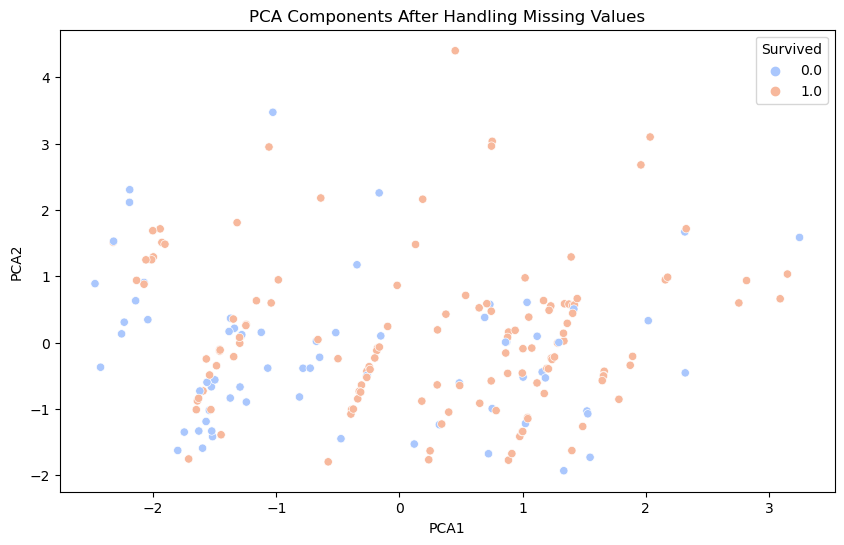

In [61]:
# PCA after handling missing values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train[numeric_columns])

train['PCA1'] = pca_result[:, 0]
train['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Survived', data=train, palette='coolwarm')
plt.title("PCA Components After Handling Missing Values")
plt.show()
